# Taiwanese Bankruptcy Prediction

We will be using data from the Taiwan Economic Journal on company financial statuses from 1999 to 2009. Our target variable is if a company went bankrupt or not. We have a long list of predictors such as Gross profit, operating income, taxes, and many other features listed in df.info() below. 


### Business Problem

Our stakeholder is a corporate loaning agency/bank/bank of taiwan and our business problem is to predict if a company will go bankrupt in order to bail them out before that or let them fail. To provide loans or not

#### Below we will import the initial libraries we believe are important

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)

import seaborn as sns

## Data overview/understanding/exploration

In [106]:
df = pd.read_csv('./data/data.csv')

In [107]:
df.head() #might need to simplify or regularization techniques

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

Below we can see that our dataset contains 6819 rows of data and 96 columns.

In [108]:
df.shape

(6819, 96)

In [109]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.03,0.51,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,0.78,1995347312.80,1950427306.06,0.47,16448012.91,0.12,0.19,0.19,0.19,0.23,0.32,1328640.60,0.11,0.18,0.02,0.85,0.69,0.69,0.22,5508096595.25,1566212.06,0.26,0.38,403284.95,8376594.82,0.63,4416336.71,0.11,0.89,0.01,0.37,0.01,0.11,0.18,0.40,0.14,12789705.24,9826220.86,2149106056.61,1008595981.82,0.04,2325854.27,0.40,11255785.32,0.81,0.40,0.52,0.12,3592902.20,37159994.15,0.09,0.35,0.28,55806804.53,0.76,0.74,0.33,54160038.14,0.93,0.00,0.03,1195855763.31,2163735272.03,0.59,2471976967.44,0.67,1220120.50,0.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [111]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

- no missing values

In [112]:
df['Bankrupt?'].value_counts(normalize=True)

0   0.97
1   0.03
Name: Bankrupt?, dtype: float64

In [113]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

- 96% vs 3% - we will need to use an oversampling technique such as SMOTE

In [104]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(30,25))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
            ax=ax, cmap='YlOrRd', #annot=True, 
            center=0, vmin=-1, vmax=1, square=True,
            linewidths=.5, 
            cbar_kws={"shrink": .5})

ax.set_title("Heatmap of Correlation Matrix");


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000022BBD5C0700> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df.iloc[:, 94:95].value_counts()

- all values are 1 so we'll drop Net Income Flag

In [ ]:
corr2 = df.corr()

fig, ax = plt.subplots(figsize=(30,25))

sns.heatmap(data=corr2[['Bankrupt?']], mask=np.triu(np.ones_like(corr2[['Bankrupt?']], dtype=bool)),
            ax=ax, cmap='YlOrRd', #annot=True, 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

ax.set_title("Heatmap of Correlation Matrix");


In [ ]:
df.hist(figsize=(25,20), bins='auto')


### Splitting the Data

In [114]:
X = df.drop(['Bankrupt?', ' Net Income Flag'], axis=1)
y = df['Bankrupt?']

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, stratify=y, test_size=.2)

### Scaling the Data

In [116]:
from sklearn.preprocessing import StandardScaler

### Oversampling using SMOTE

In [119]:
from imblearn.over_sampling import SMOTE
#try all of the under/over sampling techniques

In [ ]:
#sm = SMOTE(random_state=8)
#X_t_overasmpled, y_t_overasmpled = sm.fit_resample(X_train_scaled, y_train)

# max notes

In [ ]:
#do eda and find out what the best features are
#more data understanding
#adjust class weights in algorithm
#try all of the under/over sampling techniques
#from imblearn.undersampling and oversampling #to make the majority smaller
#try different ratios in smote -default is 1:1 - try alternative ratios IN CV
#what is the most costly error
#is fp or fn more important - minimize fn 
# score="negative_log_loss"

### Pipeline for First Baseline Logistic Regression Model

In [118]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.undersampling #to make the majority smaller
from sklearn.linear_model import LogisticRegression
model_list = {}

In [ ]:
base_steps = [('sm', SMOTE(random_state=4)),
         ('ss', StandardScaler()),
         ('logreg', LogisticRegression(random_state=4))]

In [ ]:
pipeline_base = imbpipeline(base_steps)

In [ ]:
pipeline_base.fit(X_train, y_train)

### Observing the Results of the First Baseline Logistic Regression Model

In [ ]:
pipeline_base.score(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

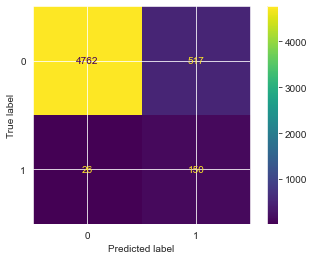

In [120]:
plot_confusion_matrix(pipeline_base, X_train, y_train)

In [24]:
from sklearn.metrics import classification_report

In [36]:
pipeline_base_preds = pipeline_base.predict(X_train)

In [37]:
print(classification_report(y_train, pipeline_base_preds))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      5279
           1       0.22      0.85      0.36       176

    accuracy                           0.90      5455
   macro avg       0.61      0.88      0.65      5455
weighted avg       0.97      0.90      0.93      5455



In [40]:
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
#y_score = logreg.fit(X_train, y_train).decision_function(X_test)

#fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [60]:
base_y_score = pipeline_base.decision_function(X_test)

In [61]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, base_y_score)

In [64]:
print('AUC: {}'.format(auc(fpr_base, tpr_base)))

AUC: 0.912276170798898


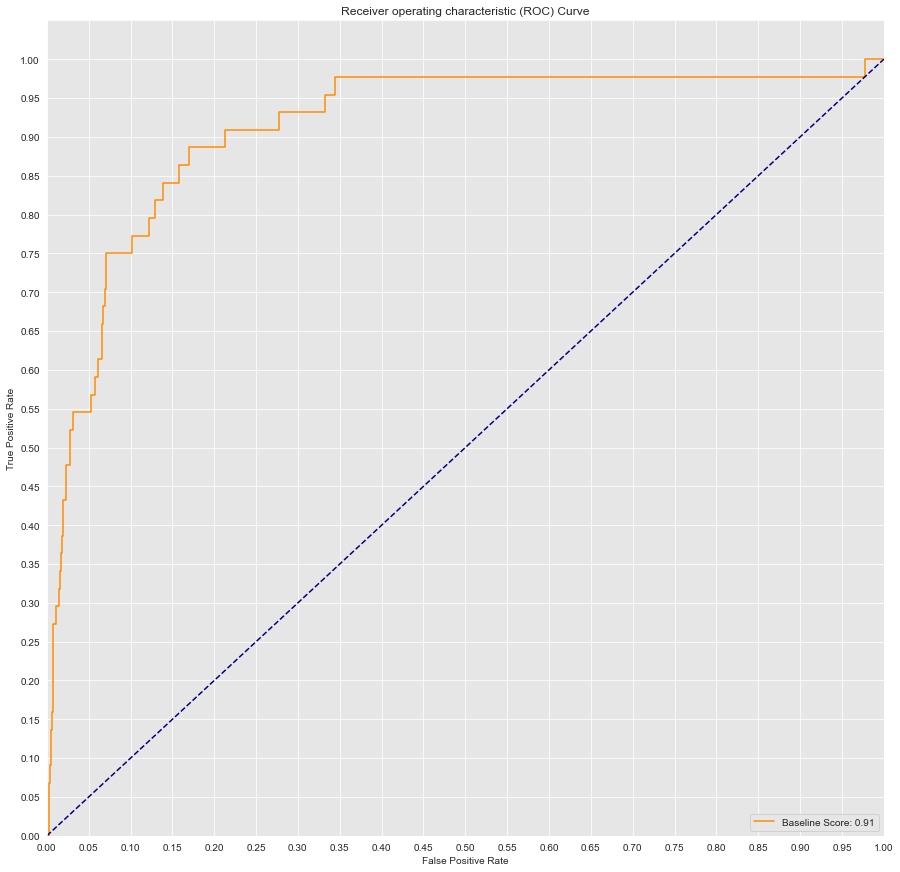

In [92]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_base, tpr_base, color='darkorange', label='Baseline Score: {:.2f}'.format(auc(fpr_base, tpr_base)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Implementing GridSearch into our Model

In [66]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [67]:
stratified_kfold = StratifiedKFold(n_splits=3,
                                  shuffle=True,
                                  random_state=4)

In [68]:
param_grid = {'logreg__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'logreg__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [69]:
grid_search = GridSearchCV(estimator=pipeline_base,
                          param_grid=param_grid,
                          scoring='roc_auc',
                          cv=stratified_kfold,
                          n_jobs=-1)

In [70]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('sm', SMOTE(random_state=4)),
                                       ('ss', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=4))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='roc_auc')

In [71]:
cv_score = grid_search.best_score_
print(f'Cross-validation score: {cv_score}')

Cross-validation score: 0.9159823621257476


In [72]:
grid_search.__dict__

{'scoring': 'roc_auc',
 'estimator': Pipeline(steps=[('sm', SMOTE(random_state=4)), ('ss', StandardScaler()),
                 ('logreg', LogisticRegression(random_state=4))]),
 'n_jobs': -1,
 'iid': 'deprecated',
 'refit': True,
 'cv': StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
 'multimetric_': False,
 'best_index_': 2,
 'best_score_': 0.9159823621257476,
 'best_params_': {'logreg__C': 0.001, 'logreg__solver': 'liblinear'},
 'best_estimator_': Pipeline(steps=[('sm', SMOTE(random_state=4)), ('ss', StandardScaler()),
                 ('logreg',
                  LogisticRegression(C=0.001, random_state=4,
                                     solver='liblinear'))]),
 'refit_time_': 0.40047192573547363,
 'scorer_': make_scorer(roc_auc_score, 

In [73]:
best_param = grid_search.best_params_

In [74]:
print(f'Best base parameter: {best_param}')

Best base parameter: {'logreg__C': 0.001, 'logreg__solver': 'liblinear'}


In [75]:
model_list['basemodel'] = pipeline_base

#### 2nd model

In [76]:
lr_steps = [('sm', SMOTE(random_state=4)),
         ('ss', StandardScaler()),
         ('logreg', LogisticRegression(random_state=4, C=.001, solver='liblinear'))]

In [77]:
pipeline_lr = imbpipeline(lr_steps)

In [78]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('sm', SMOTE(random_state=4)), ('ss', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.001, random_state=4,
                                    solver='liblinear'))])

In [79]:
pipeline_lr.score(X_train, y_train)

0.8775435380384968

In [80]:
model_list['lr'] = pipeline_lr

In [81]:
model_list

{'basemodel': Pipeline(steps=[('sm', SMOTE(random_state=4)), ('ss', StandardScaler()),
                 ('logreg', LogisticRegression(random_state=4))]),
 'lr': Pipeline(steps=[('sm', SMOTE(random_state=4)), ('ss', StandardScaler()),
                 ('logreg',
                  LogisticRegression(C=0.001, random_state=4,
                                     solver='liblinear'))])}

In [83]:
lr_y_score = pipeline_lr.decision_function(X_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_y_score)
print('AUC: {}'.format(auc(fpr_lr, tpr_lr)))

AUC: 0.9164944903581267


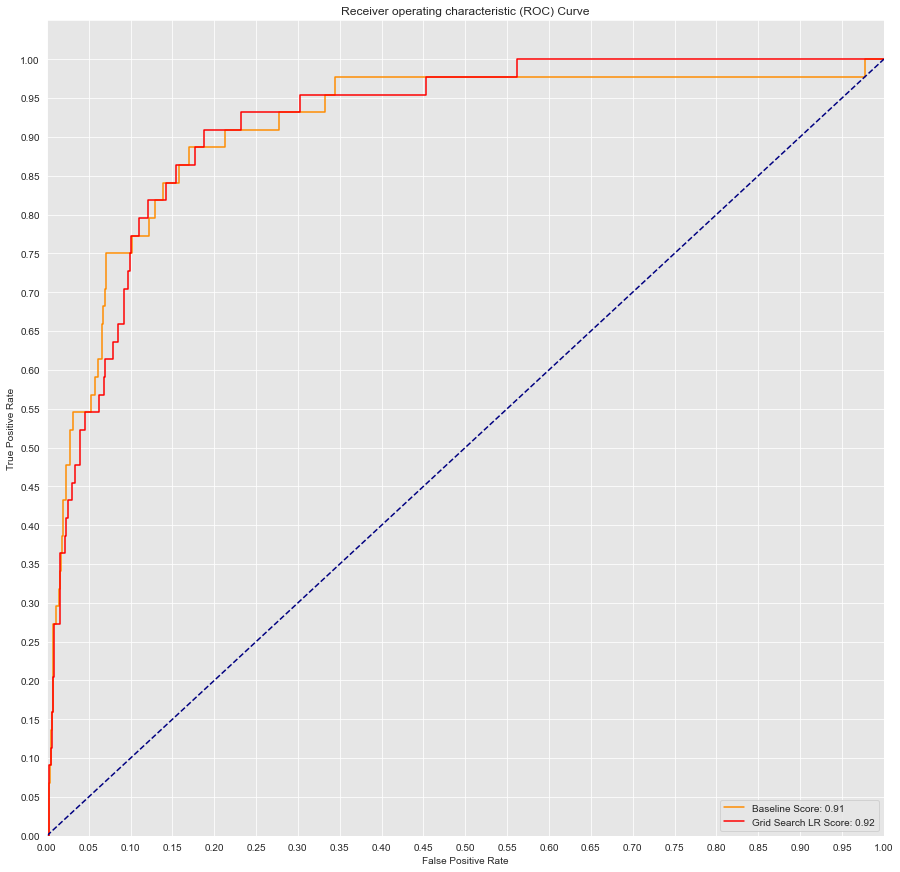

In [93]:
import seaborn as sns
fig, ax,  = plt.subplots(figsize=(15, 15))
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
ax.plot(fpr_base, tpr_base, color='darkorange', label='Baseline Score: {:.2f}'.format(auc(fpr_base, tpr_base)))
ax.plot(fpr_lr, tpr_lr, color='red', label='Grid Search LR Score: {:.2f}'.format(auc(fpr_lr, tpr_lr)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 3rd model - Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [42]:
dt_steps = [('sm', SMOTE(random_state=4)),
                       ('dtree', DecisionTreeClassifier(random_state=4))]
                       

In [43]:
pipeline_dt = imbpipeline(dt_steps)

In [44]:
dt_param_grid = {'dtree__criterion':['gini', 'entropy'], 
              'dtree__splitter':['best', 'random'],
              'dtree__max_depth':[2,4,6,8,10,12]}

In [45]:
dt_grid_search = GridSearchCV(estimator=pipeline_dt,
                          param_grid=dt_param_grid,
                          scoring='roc_auc',
                          cv=stratified_kfold,
                          n_jobs=-1)

In [46]:
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('sm', SMOTE(random_state=4)),
                                       ('dtree',
                                        DecisionTreeClassifier(random_state=4))]),
             n_jobs=-1,
             param_grid={'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [2, 4, 6, 8, 10, 12],
                         'dtree__splitter': ['best', 'random']},
             scoring='roc_auc')

In [47]:
dt_grid_search.score(X_train, y_train)

0.9053103850591537

In [48]:
dt_grid_search.__dict__

{'scoring': 'roc_auc',
 'estimator': Pipeline(steps=[('sm', SMOTE(random_state=4)),
                 ('dtree', DecisionTreeClassifier(random_state=4))]),
 'n_jobs': -1,
 'iid': 'deprecated',
 'refit': True,
 'cv': StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'dtree__criterion': ['gini', 'entropy'],
  'dtree__splitter': ['best', 'random'],
  'dtree__max_depth': [2, 4, 6, 8, 10, 12]},
 'multimetric_': False,
 'best_index_': 12,
 'best_score_': 0.8847925988452373,
 'best_params_': {'dtree__criterion': 'entropy',
  'dtree__max_depth': 2,
  'dtree__splitter': 'best'},
 'best_estimator_': Pipeline(steps=[('sm', SMOTE(random_state=4)),
                 ('dtree',
                  DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                         random_state=4))]),
 'refit_time_': 0.6801855564117432,
 'scorer_': make_scorer(roc_auc_score, 

In [49]:
dt_best_params = dt_grid_search.best_params_
print(f'Best decision tree parameters: {dt_best_params}')

Best decision tree parameters: {'dtree__criterion': 'entropy', 'dtree__max_depth': 2, 'dtree__splitter': 'best'}


In [50]:
dt_best_score = dt_grid_search.best_score_
print(f'Decision Tree best score: {dt_best_score}')

Decision Tree best score: 0.8847925988452373


In [56]:
dt_grid_search.best_estimator_

Pipeline(steps=[('sm', SMOTE(random_state=4)),
                ('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2,
                                        random_state=4))])

In [ ]:
#dt_model = Decisio….(**best_params)
